In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

SEED = 42

# Dataset exploration

In [2]:
len(os.listdir('./data'))

250

In [3]:
files = os.listdir('./data')

dataset = []

for file in files:
    ts = np.loadtxt(f'./data/{file}')
    start, a_start, a_end = [
        int(i) for i in file.split('.')[0].split('_')[-3:]
    ]
    dataset.append(
        (
            file,
            start,
            a_start,
            a_end,
            len(ts)
        )
    )

In [4]:
df = pd.DataFrame(
    data = dataset,
    columns=['name', 'test_start', 'anomaly_start', 'anomaly_end', 'length']
)
df['anomaly_length'] = df['anomaly_end'] - df['anomaly_start']
df.describe()

,test_start,anomaly_start,anomaly_end,length,anomaly_length
count,250.000000,250.000000,250.00000,250.000000,250.000000
mean,21209.796000,51732.584000,51929.03600,77415.064000,196.452000
std,32481.890956,96602.193981,96691.29225,120321.279605,238.199571
min,1000.000000,2764.000000,2995.00000,6684.000000,0.000000
25%,4000.000000,6521.750000,6579.75000,11308.000000,48.000000
50%,9406.000000,17390.000000,17520.00000,30066.000000,100.000000
75%,23300.000000,55600.000000,55875.00000,80000.750000,267.500000
max,250000.000000,884100.000000,884200.00000,900000.000000,1700.000000


In [5]:
df['length'].mean() * len(df)

19353766.0

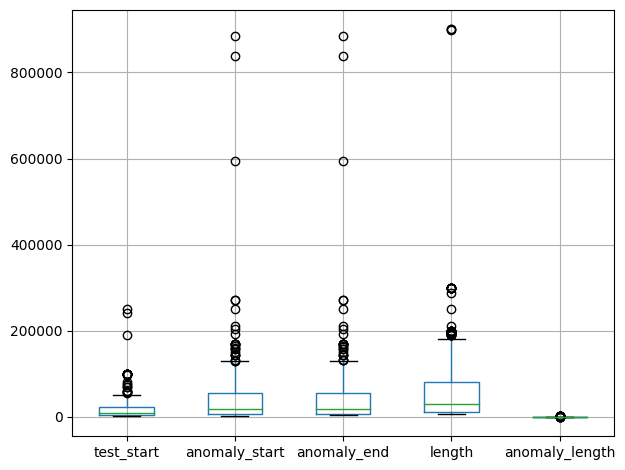

In [6]:
df.boxplot()
plt.tight_layout()

In [7]:
df[df['length'] > 150000]

,name,test_start,anomaly_start,anomaly_end,length,anomaly_length
9,239_UCR_Anomaly_taichidbS0715Master_190037_593...,190037,593450,593514,897667,64
10,240_UCR_Anomaly_taichidbS0715Master_240030_884...,240030,884100,884200,900000,100
11,241_UCR_Anomaly_taichidbS0715Master_250000_837...,250000,837400,839100,900000,1700
12,242_UCR_Anomaly_tilt12744mtable_100000_104630_...,100000,104630,104890,286667,260
13,243_UCR_Anomaly_tilt12744mtable_100000_203355_...,100000,203355,203400,250001,45
14,244_UCR_Anomaly_tilt12754table_100013_104630_1...,100013,104630,104890,300262,260
15,245_UCR_Anomaly_tilt12754table_100211_270800_2...,100211,270800,271070,298747,270
16,246_UCR_Anomaly_tilt12755mtable_100211_270800_...,100211,270800,271070,299867,270
17,247_UCR_Anomaly_tilt12755mtable_50211_121900_1...,50211,121900,121980,200000,80
35,015_UCR_Anomaly_DISTORTEDECG4_5000_16800_17100...,5000,16800,17100,200000,300


<AxesSubplot: >

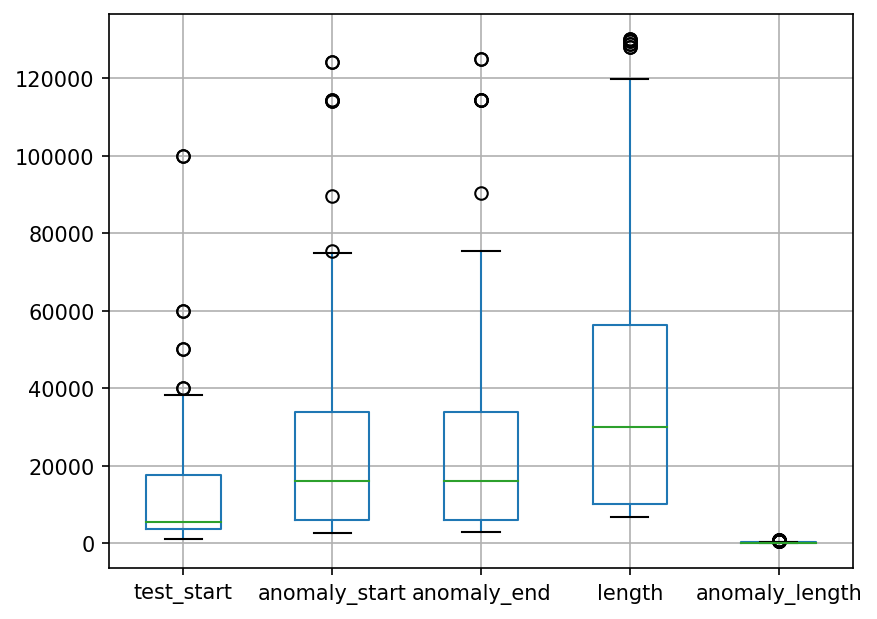

In [8]:
plt.figure(dpi=150)
df[df['length'] < 150000].boxplot()

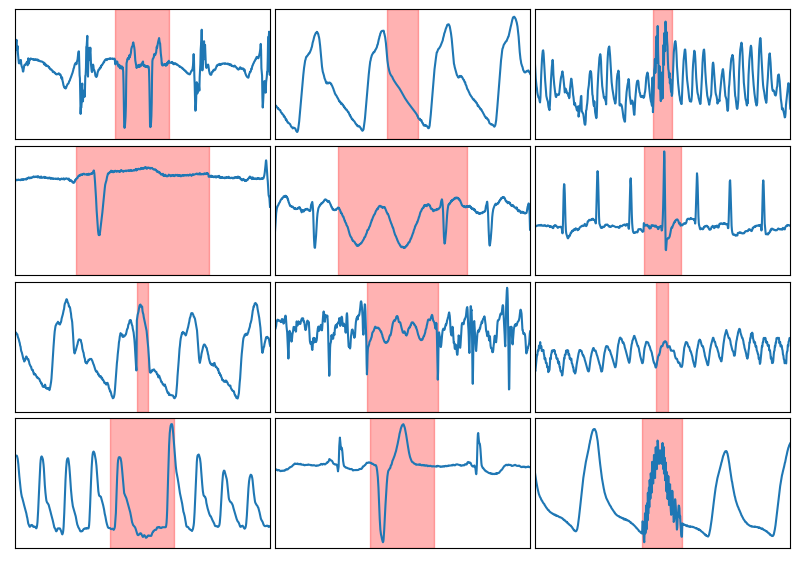

In [9]:
random_datasets = df.sample(12)

fig = plt.figure(figsize=(10, 7), dpi=100)
for i, row in enumerate(random_datasets.values):
    file = row[0]
    anomaly_start = row[2]
    anomaly_end = row[3]
    
    x = i//3
    y = i%3
    plt.subplot2grid((4,3), (x, y))
    ts = np.loadtxt(f'./data/{file}')
    plt.plot(ts)
    plt.xlim(anomaly_start - 300, anomaly_end + 300)
    plt.axvspan(anomaly_start, anomaly_end, color='red', alpha=0.3)
    plt.xticks([])
    plt.yticks([])

fig.subplots_adjust(hspace=0.05, wspace=0.02)

In [16]:
from sklearn.model_selection import train_test_split
print(len(df))
sdf = df[df['length']<150000]
print(len(sdf))

train, test = train_test_split(sdf['name'].values, test_size=0.3, random_state=SEED)
print(len(train))
print(len(test))
# with open('./train.txt', 'w') as f_train:
#     f_train.writelines([str(f)+'\n' for f in train])

# with open('./test.txt', 'w') as f_test:
#     f_test.writelines([str(f)+'\n' for f in test])

250
208
145
63
